In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
google_play_df = pd.read_csv('googleplaystore.csv')

In [3]:
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_play_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
google_play_df.shape

(10841, 13)

In [6]:
total_cells = np.product(google_play_df.shape)
total_cells

140933

In [7]:
#Preliminary Ideas - probably predicting the rating of an app in a data science context
#Average threshold rating for an app is like 4.0

In [8]:
#First, let's look at the data types 
google_play_df.info()
#Look's like there are several null values in Rating and a few in Type, Content Rating, Current Ver, and Android Ver

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
google_play_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
#What are all the categories?
app_categories = google_play_df['Category'].unique()
app_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
#How many unique categories are there?
len(app_categories)

34

In [12]:
#I just realized that the columns 'Categories' and 'Genres' are redundant, but some of the same categories have different spellings in genres
# ie. Art & Design;Pretend Play and Art & Design 
#What are all the genres?
genre_categories = google_play_df['Genres'].unique()
genre_categories
#Wow, that's a lot, there's one called 'February 11, 2018'

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [13]:
#How many unique genres are there?
len(genre_categories)
#Going to drop genres

120

In [14]:
#Don't run the code more than once, because you just need to drop it once  
google_play_df.drop(columns = ['Genres'], inplace = True)

In [15]:
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


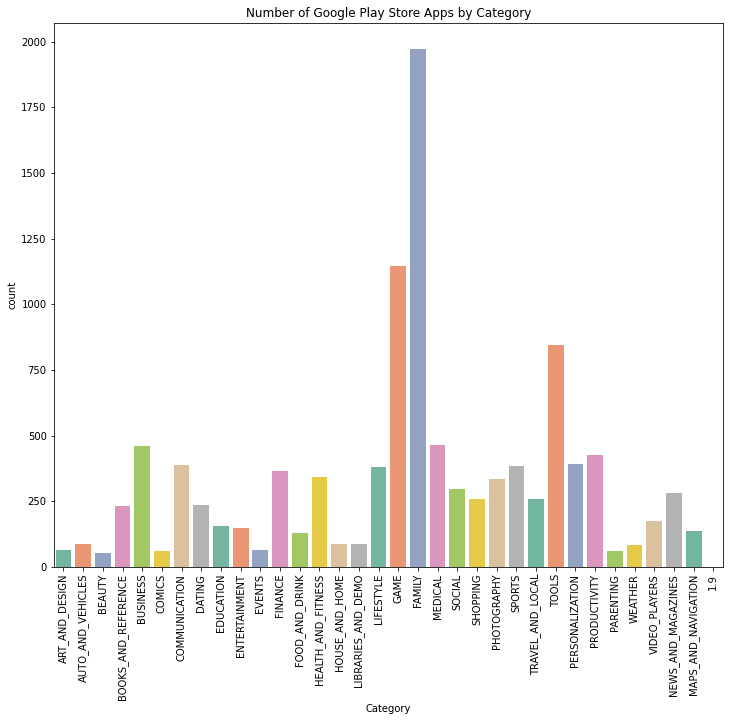

In [16]:
#How many apps are there per category?
#Let's do a countplot graph
plt.figure(figsize = (12, 10))
plt.xticks(rotation = 90)
plt.title('Number of Google Play Store Apps by Category')
ax = sns.countplot(x = 'Category', data = google_play_df, palette = 'Set2')
#I'm surprised the Category 'GAME' is not the most frequent
#There is a category called 1.9

In [17]:
#Let's group by the categories and count
google_play_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [18]:
len(google_play_df['Category'].unique())

34

In [19]:
#Exploring the types of family apps 
google_play_family_apps = google_play_df[google_play_df['Category'] == 'FAMILY']
google_play_family_apps.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,"50,000,000+",Free,0,Everyone,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,"10,000,000+",Free,0,Everyone,"July 4, 2018",2.9.3181,4.0.3 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,"July 4, 2018",1.8.3181,4.0.3 and up
2022,Educational Games 4 Kids,FAMILY,4.3,11618,39M,"5,000,000+",Free,0,Everyone,"April 3, 2018",2.4,4.1 and up
2023,Candy Pop Story,FAMILY,4.7,12948,23M,"1,000,000+",Free,0,Everyone,"May 24, 2018",2.0.3165,2.3 and up


In [20]:
#Let's look at the 1.9 Category
google_play_1_9_category = google_play_df[google_play_df['Category'] == '1.9']
google_play_1_9_category
#I would recategorize it in PHOTOGRAPHY category
#Also, why is the rating of it 19.0?

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up,NaN


In [21]:
#I looked up the app and changed the category to PHOTOGRAPHY and rating to 2.7
google_play_df['Category'] = google_play_df['Category'].replace('1.9', 'PHOTOGRAPHY')
google_play_df['Rating'] = google_play_df['Rating'].replace(19.0, 2.7)

In [22]:
test_1_9 = google_play_df[google_play_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']
test_1_9

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,2.7,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up,NaN


In [23]:
#Summary statistics of Ratings
google_play_df.describe()

,Rating
count,9367.000000
mean,4.191598
std,0.515422
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


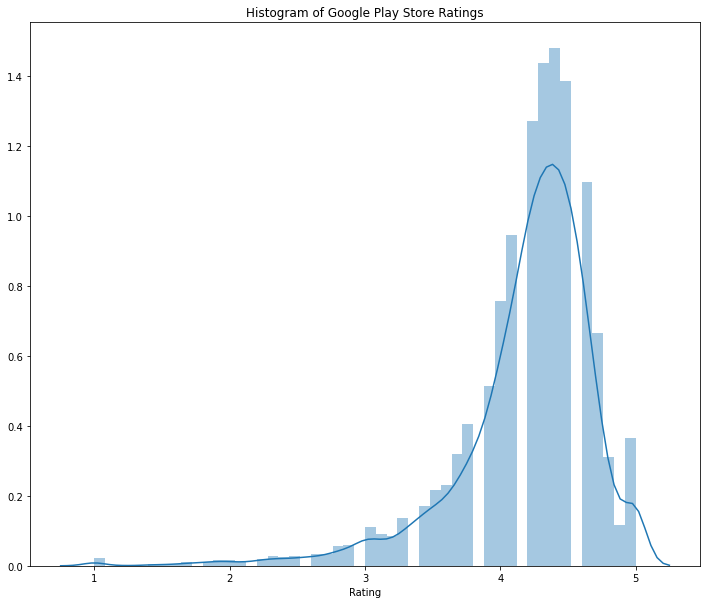

In [24]:
#Histogram of Ratings, but can't get a decimal interval range
plt.figure(figsize=(12,10))
plt.title('Histogram of Google Play Store Ratings')
ax = sns.distplot(a = google_play_df['Rating'], kde = True)
#very left-skewed 

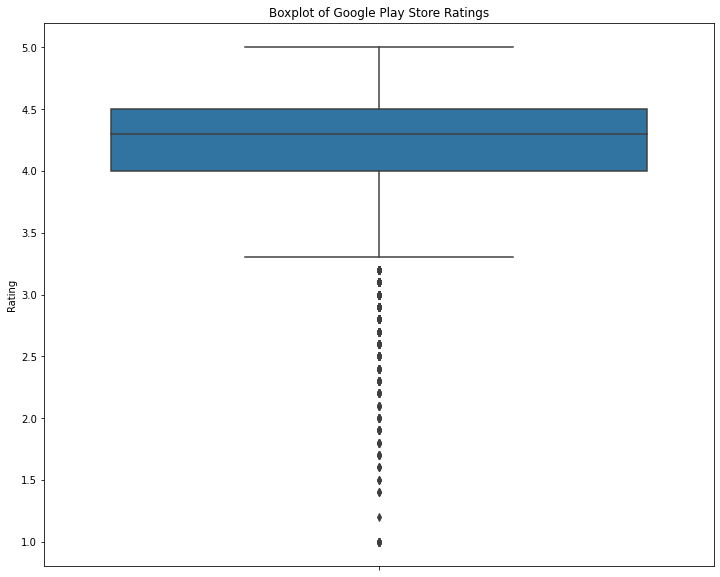

In [25]:
plt.figure(figsize=(12,10))
plt.title('Boxplot of Google Play Store Ratings')
sns.boxplot(x = google_play_df['Rating'], orient = 'v')
#seems like most of the ratings are slanted between 4.0 and 4.5

In [26]:
google_play_df['Rating'].quantile([.25, .5, .75, 1.0])
#IQR is 0.5

0.25    4.0
0.50    4.3
0.75    4.5
1.00    5.0
Name: Rating, dtype: float64

In [27]:
#So there are null values in Rating, let's look at them
google_play_df[google_play_df['Rating'].isnull()]
#I'm not sure, should I just replace the rating with zero or drop them
#I could just find the rating online, but there's 1,474 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,"September 29, 2016",1.1.5,4.0 and up


In [28]:
#filling all the entire NaN values of the dataset with the values before it and the remaining is zero
df_all_filled = google_play_df.fillna(method = 'bfill', axis = 0).fillna(0)
df_all_filled

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device,Varies with device


In [29]:
#Will just fill the NaN ratings with zero
google_play_df['Rating'] = google_play_df['Rating'].replace(np.nan, 0)

In [30]:
#No more NaN for Rating
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1016.5+ KB


In [31]:
#Just checking for one value
fr_forms_app = google_play_df[google_play_df['App'] == 'FR Forms']
fr_forms_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,0.0,0,9.6M,10+,Free,0,Everyone,"September 29, 2016",1.1.5,4.0 and up


In [32]:
#For reviews, let's change to int
google_play_df['Reviews'] = google_play_df['Reviews'].astype('int')
#So, I discovered there's an M for millions

ValueError: invalid literal for int() with base 10: '3.0M'

In [33]:
reviews_with_m = google_play_df[google_play_df['Reviews'].str.contains('M')]
reviews_with_m
#of course, the wonky one
#I don't think it has 3 million reviews; it says 40 votes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,2.7,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up,NaN


In [34]:
google_play_df['Reviews'] = google_play_df['Reviews'].replace('3.0M', '40')
google_play_df['Reviews'] = google_play_df['Reviews'].astype('int')
google_play_df.info()
#changed 'Reviews' to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1016.5+ KB


In [35]:
google_play_df['Reviews'].describe()

count    1.084100e+04
mean     4.441119e+05
std      2.927629e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.476800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

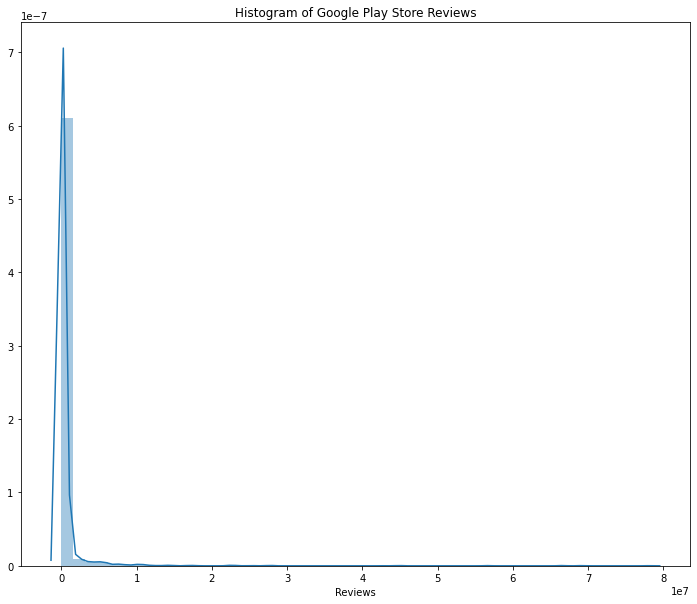

In [36]:
#Histogram of Reviews
plt.figure(figsize=(12,10))
plt.title('Histogram of Google Play Store Reviews')
ax = sns.distplot(a = google_play_df['Reviews'])
#Mm, it's super disperse 

In [37]:
google_play_df['Reviews'].max()

78158306

In [38]:
google_play_df[google_play_df['Reviews'] == google_play_df['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,"August 3, 2018",Varies with device,Varies with device


In [39]:
google_play_df['Reviews'].min()

0

In [40]:
google_play_df[google_play_df['Reviews'] == google_play_df['Reviews'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,0.0,0,20M,50+,Paid,$1.49,Teen,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,0.0,0,18k,100+,Paid,$2.99,Everyone,"July 25, 2017",1.0.1,4.0 and up
621,Dating White Girls,DATING,0.0,0,3.6M,50+,Free,0,Mature 17+,"July 20, 2018",1.0,4.0 and up
623,Geeks Dating,DATING,0.0,0,13M,50+,Free,0,Mature 17+,"July 10, 2018",1.0,4.1 and up
627,CAM5678 Video Chat,DATING,0.0,0,39M,500+,Free,0,Mature 17+,"July 13, 2018",5.5.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,0.0,0,8.9M,10+,Free,0,Everyone,"July 31, 2018",7.2.2,4.1 and up
10774,Miss FQ,NEWS_AND_MAGAZINES,0.0,0,36M,10+,Free,0,Everyone,"April 5, 2018",3.8,4.4 and up
10798,Word Search Tab 1 FR,FAMILY,0.0,0,1020k,50+,Paid,$1.04,Everyone,"February 6, 2012",1.1,3.0 and up
10822,PLMGSS FR,PRODUCTIVITY,0.0,0,3.1M,10+,Free,0,Everyone,"December 1, 2017",1,4.4 and up


In [41]:
#START OF SIZE FIXING

In [42]:
#For size, only looks like there is kilobytes(k) or Megabytes(M)
#I realized I could have just used unique
other_sizes = google_play_df[~((google_play_df['Size'].str.contains('M')) | (google_play_df['Size'].str.contains('k')))]
other_sizes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,"March 23, 2018",Varies with device,Varies with device


In [43]:
google_play_df['Size'] = google_play_df['Size'].replace('Varies with device', '0')

In [44]:
google_play_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '0', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

In [45]:
#Tried just isolating, but the length of the dataframe is very obviously not the same
size_m = google_play_df[google_play_df['Size'].str.contains('M',na = False)]

In [46]:
#Doesn't work
size_array = []
for i in range(len(google_play_df)):
    #if google_play_df[google_play_df['Size'].str.contains]
    current_key = google_play_df.iloc[i]
    if(current_key['Size'].str.contains('M')):
        size_array = current_key['Size']

AttributeError: 'str' object has no attribute 'str'

In [47]:
#getting closer and using regex
import re
size_array = []
for i in range(len(google_play_df)):
    #if google_play_df[google_play_df['Size'].str.contains]
    check = google_play_df.loc[i , 'Size'] #check is the row value
    if('M' in check):
        size_array.append(float(re.findall("\d+", check)[0]))
    elif('k' in check):
        size_array.append((float(re.findall("\d+", check)[0]))/1000)
    else:
        size_array.append(float(re.findall("\d+", check)[0]))
size_array

[19.0,
 14.0,
 8.0,
 25.0,
 2.0,
 5.0,
 19.0,
 29.0,
 33.0,
 3.0,
 28.0,
 12.0,
 20.0,
 21.0,
 37.0,
 2.0,
 5.0,
 17.0,
 39.0,
 31.0,
 14.0,
 12.0,
 4.0,
 7.0,
 23.0,
 6.0,
 25.0,
 6.0,
 4.0,
 4.0,
 9.0,
 5.0,
 11.0,
 11.0,
 4.0,
 9.0,
 24.0,
 0.0,
 11.0,
 9.0,
 15.0,
 10.0,
 0.0,
 1.0,
 12.0,
 24.0,
 26.0,
 8.0,
 7.0,
 25.0,
 56.0,
 57.0,
 0.0,
 35.0,
 33.0,
 33.0,
 5.0,
 54.0,
 0.201,
 3.0,
 5.0,
 17.0,
 8.0,
 2.0,
 27.0,
 2.0,
 2.0,
 0.0,
 0.0,
 7.0,
 35.0,
 16.0,
 16.0,
 0.0,
 17.0,
 3.0,
 8.0,
 3.0,
 2.0,
 38.0,
 32.0,
 37.0,
 15.0,
 5.0,
 18.0,
 0.0,
 38.0,
 1.0,
 0.0,
 0.0,
 7.0,
 35.0,
 0.0,
 17.0,
 19.0,
 14.0,
 2.0,
 4.0,
 17.0,
 14.0,
 9.0,
 21.0,
 0.0,
 52.0,
 14.0,
 25.0,
 9.0,
 0.0,
 12.0,
 0.0,
 35.0,
 6.0,
 30.0,
 5.0,
 2.0,
 17.0,
 2.0,
 0.0,
 0.0,
 2.0,
 4.0,
 7.0,
 57.0,
 3.0,
 22.0,
 24.0,
 7.0,
 21.0,
 3.0,
 2.0,
 3.0,
 6.0,
 3.0,
 8.0,
 9.0,
 2.0,
 23.0,
 4.0,
 3.0,
 0.0,
 4.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 5.0,
 0.0,
 2.0,
 5.0,
 0.0,
 5.0,
 13.0,
 7

In [48]:
#Finally, I got it
#Had to convert list into a series 
col_new = pd.Series(size_array)
google_play_df['Updated Size (M)'] = col_new.values
google_play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,8.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",1.48,4.1 and up,53.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",1.0,4.1 and up,3.0
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",1.0,2.2 and up,9.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,0.0


In [49]:
#just checking
google_play_df[google_play_df['Size'].str.contains('k')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M)
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,"August 26, 2014",1.0.1,2.2 and up,0.201
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up,0.023
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,"September 2, 2015",0.1.100944346,4.0.3 and up,0.079
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,"June 7, 2016",5.28.0,2.3 and up,0.118
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,"July 6, 2014",2.8,2.0 and up,0.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,"September 20, 2014",1.1,1.6 and up,0.552
10764,FP Transportation,AUTO_AND_VEHICLES,0.0,1,885k,1+,Free,0,Everyone,"March 9, 2018",10.0.0,4.0 and up,0.885
10798,Word Search Tab 1 FR,FAMILY,0.0,0,1020k,50+,Paid,$1.04,Everyone,"February 6, 2012",1.1,3.0 and up,1.020
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,"February 16, 2014",6.0,2.1 and up,0.582


In [50]:
google_play_df['Updated Size (M)'].describe()

count    10841.000000
mean        18.000744
std         22.260357
min          0.000000
25%          2.000000
50%          9.000000
75%         26.000000
max        100.000000
Name: Updated Size (M), dtype: float64

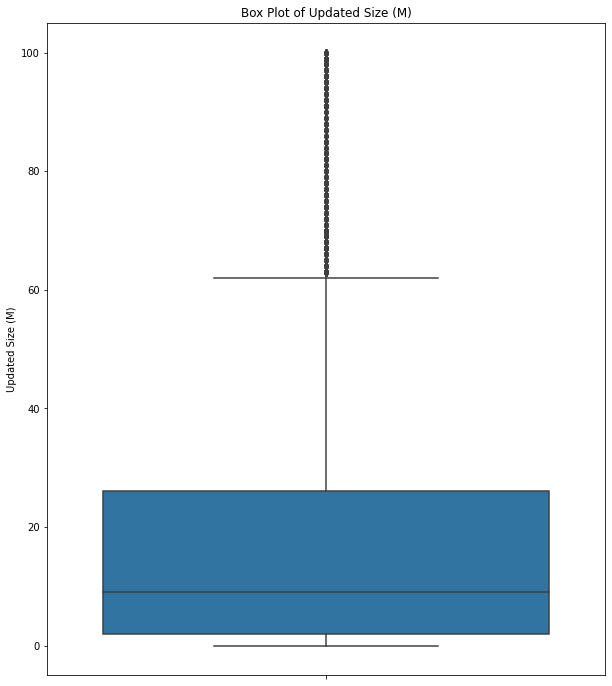

In [51]:
plt.figure(figsize=(10,12))
plt.title("Box Plot of Updated Size (M)")
ax = sns.boxplot(x=google_play_df['Updated Size (M)'], orient = 'v')

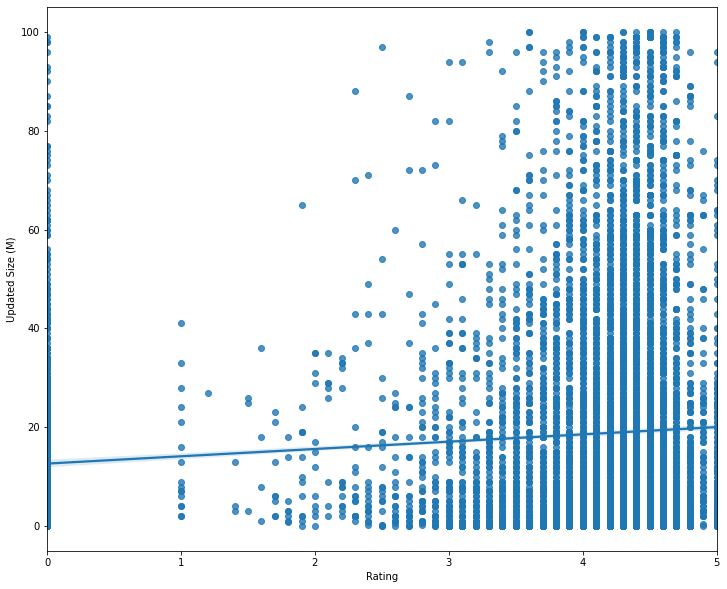

In [52]:
#Scatterplot - more of a test
plt.figure(figsize=(12,10))
ax = sns.regplot(x=google_play_df['Rating'], y = google_play_df['Updated Size (M)'])
#Bruh
#Doesn't seem to be any correlation between Rating and Updated Size

In [53]:
#Installs - any other symbols beyond +
install_split = google_play_df['Installs'].str.split('+', n=1, expand=True)
install_split_zero = install_split[0]
google_play_df['Updated Installs'] = pd.Series(install_split_zero).values

In [54]:
def convert_install(val):
    if val == 'Free':
        val = '0'
    new_val = val.replace(',', '')
    return int(new_val)

In [55]:
google_play_df['Updated Installs'] = google_play_df['Updated Installs'].apply(convert_install)

In [56]:
#Updated Installs column now is int
google_play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M),Updated Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,19.0,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,14.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,8.0,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up,25.0,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up,2.0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",1.48,4.1 and up,53.0,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",1.0,4.1 and up,3.0,100
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",1.0,2.2 and up,9.0,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,0.0,1000


In [57]:
google_play_df['Updated Installs'].describe()

count    1.084100e+04
mean     1.546291e+07
std      8.502557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Updated Installs, dtype: float64

In [58]:
avg_ratings_by_category = google_play_df.groupby('Category').agg(['mean'])
avg_ratings_by_category

,Rating,Reviews,Updated Size (M),Updated Installs
,mean,mean,mean,mean
Category,,,,
ART_AND_DESIGN,4.156923,2.637600e+04,11.569231,1.912894e+06
AUTO_AND_VEHICLES,3.598824,1.369019e+04,17.471600,6.250613e+05
BEAUTY,3.390566,7.476226e+03,12.000000,5.131519e+05
BOOKS_AND_REFERENCE,3.348918,9.506090e+04,11.131307,8.318050e+06
BUSINESS,2.714783,3.033598e+04,12.391011,2.178076e+06
COMICS,4.016667,5.638793e+04,11.300883,9.347692e+05
COMMUNICATION,3.524548,2.107138e+06,7.921646,8.435989e+07
DATING,3.308974,3.115931e+04,14.880419,1.129533e+06


In [59]:
#Also, I can filter by ratings to see which app categories are the most popular
#Some apps have higher ratings but few reviews
#Barplot on ratings for free vs paid apps
top_apps = google_play_df[google_play_df['Rating'] >= 4.6]
top_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M),Updated Installs
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,8.000,5000000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,"July 3, 2018",2.8,4.0.3 and up,3.000,10000
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,"June 26, 2018",1.0.4,4.4 and up,21.000,100000
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,"July 31, 2018",3.1,4.1 and up,5.000,500000
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,"July 30, 2018",5.5.4,4.1 and up,31.000,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,Fr Lupupa Sermons,BUSINESS,4.8,19,21M,100+,Free,0,Everyone,"June 12, 2018",1.0,4.4 and up,21.000,100
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,"June 27, 2018",3.8.0,4.1 and up,8.000,1000
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,"June 19, 2016",2.96,4.1 and up,7.000,10000
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,"March 23, 2014",0.8,2.2 and up,0.619,1000


In [60]:
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               10841 non-null  object 
 1   Category          10841 non-null  object 
 2   Rating            10841 non-null  float64
 3   Reviews           10841 non-null  int64  
 4   Size              10841 non-null  object 
 5   Installs          10841 non-null  object 
 6   Type              10840 non-null  object 
 7   Price             10841 non-null  object 
 8   Content Rating    10840 non-null  object 
 9   Last Updated      10841 non-null  object 
 10  Current Ver       10833 non-null  object 
 11  Android Ver       10838 non-null  object 
 12  Updated Size (M)  10841 non-null  float64
 13  Updated Installs  10841 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [61]:
#quantitiative data on ratings, reviews, price (depending on the type )
#Group by with category - category with the highest ratings, installs, reviews
#Data cleaning on size (remove M) and installs (remove+)[DONE]
#Unique number of "Type" and "Content Rating" and "Genres"
#Last updated - change to date time format
#What are other metrics from mobile app analytics sites like Sensor Tower?
#Would be interesting to filter apps by geography like some look French

In [62]:
#Confusing areas
#What to do with NaN values? Probably not drop them, so replace with zero or bfill them
#Varies with Device for the column Size  - I just put zero
#Very high range of values for reviews, even Updated Size (M), and installs

In [63]:
#look at it by category
#also define threshholds for number of reviews
#Dataset is imbalanced
#Dictionary: key with the category, value is the dataframe containing all the entries

In [65]:
#condense the categories, especially the small ones (maybe to 10 or so)
#Group the categories together - News and magazines/comics could go together
#In entertainment, some could go into  Video Players, and Art & Design :-P
#Lifestyle is a bad category - why is Safeway and H&M in there?
google_play_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             336
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [105]:
google_play_df[google_play_df['Category'] == 'LIFESTYLE'].head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M),Updated Installs
1562,Dollhouse Decorating Games,LIFESTYLE,4.1,18968,32M,"5,000,000+",Free,0,Teen,"April 26, 2018",5.1,4.1 and up,32.0,5000000
1563,metroZONE,LIFESTYLE,4.1,47497,34M,"10,000,000+",Free,0,Everyone,"June 8, 2018",5.3.0.54.7,5.0 and up,34.0,10000000
1564,Easy Hair Style Design,LIFESTYLE,4.3,601,5.1M,"100,000+",Free,0,Everyone,"December 20, 2017",1.0,2.3 and up,5.0,100000
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,"10,000,000+",Free,0,Everyone,"July 16, 2018",9.0,4.0 and up,100.0,10000000
1566,"Black Wallpaper, AMOLED, Dark Background: Darkify",LIFESTYLE,4.6,51357,80M,"5,000,000+",Free,0,Everyone,"July 31, 2018",8.0,4.0 and up,80.0,5000000
1567,Girly Wallpapers Backgrounds,LIFESTYLE,4.4,13565,3.3M,"1,000,000+",Free,0,Everyone,"August 5, 2018",2.5,4.0 and up,3.0,1000000
1568,Chart - Myanmar Keyboard,LIFESTYLE,4.4,39364,28M,"5,000,000+",Free,0,Everyone,"July 17, 2018",10.19,4.0.3 and up,28.0,5000000
1569,Easy Makeup Tutorials,LIFESTYLE,4.3,7287,5.0M,"1,000,000+",Free,0,Everyone,"November 3, 2016",1.0,2.3 and up,5.0,1000000
1570,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11M,"10,000,000+",Free,0,Everyone 10+,"June 25, 2018",5.2.4(881),4.0.3 and up,11.0,10000000
1571,Entel,LIFESTYLE,3.2,16168,55M,"1,000,000+",Free,0,Everyone,"July 26, 2018",2.2.9,4.0.3 and up,55.0,1000000


In [84]:
condensed_categories = google_play_df

In [120]:
def change_categories(val):
    if ((val == 'SOCIAL') or (val ==  'COMMUNICATION') or (val == 'DATING')):
        val = 'Social and Dating'
    elif ((val == 'TOOLS') or (val == 'VIDEO_PLAYERS') or (val == 'PRODUCTIVITY') or (val == 'BUSINESS') or (val == 'ART_AND_DESIGN') or (val == 'PHOTOGRAPHY')):
        val = 'Business and Productivity'
    elif ((val == 'HEALTH_AND_FITNESS') or (val == 'BEAUTY') or (val == 'SHOPPING') or (val == 'PARENTING') or (val == 'HOUSE_AND_HOME') or (val == 'HOUSE_AND_HOME') or (val == 'AUTO_AND_VEHICLES')):
        val = 'Lifestyle and Shopping'
    elif ((val == 'FAMILY') or (val == 'ENTERTAINMENT') or (val == 'SPORTS') or (val == 'LIFESTYLE') or (val == 'COMICS') or (val == 'PERSONALIZATION')):
        val = 'Family and Entertainment'
    elif ((val == 'TRAVEL_AND_LOCAL') or (val == 'FOOD_AND_DRINK') or (val == 'MAPS_AND_NAVIGATION') or (val == 'EVENTS') or (val == 'WEATHER')):
        val = 'Travel and Navigation'
    elif ((val == 'NEWS_AND_MAGAZINES') or (val == 'EDUCATION') or (val == 'BOOKS_AND_REFERENCE') or (val == 'LIBRARIES_AND_DEMO')):
        val = 'News and Education'
    elif ((val == 'GAME')):
        val = 'Game'
    elif ((val == 'MEDICAL')):
        val = 'Medical'
    elif ((val == 'FINANCE')):
        val = 'Finance'
    return val
    

In [121]:
google_play_df['Updated Category'] = google_play_df['Category'].apply(change_categories)

In [122]:
google_play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Updated Size (M),Updated Installs,Updated Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,19.0,10000,Business and Productivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,14.0,500000,Business and Productivity
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,8.0,5000000,Business and Productivity
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up,25.0,50000000,Business and Productivity
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up,2.0,100000,Business and Productivity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",1.48,4.1 and up,53.0,5000,Family and Entertainment
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",1.0,4.1 and up,3.0,100,Family and Entertainment
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",1.0,2.2 and up,9.0,1000,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,0.0,1000,News and Education


In [133]:
list_keys = list(google_play_df['Updated Category'].unique())
list_keys

['Business and Productivity',
 'Lifestyle and Shopping',
 'News and Education',
 'Family and Entertainment',
 'Social and Dating',
 'Travel and Navigation',
 'Finance',
 'Game',
 'Medical']

In [132]:
len(google_play_df['Updated Category'].unique())

9

In [129]:
list_categories = [google_play_df[google_play_df['Updated Category'] == 'Business and Productivity'], google_play_df[google_play_df['Updated Category'] == 'Lifestyle and Shopping'], google_play_df[google_play_df['Updated Category'] == 'News and Education'], google_play_df[google_play_df['Updated Category'] == 'Family and Entertainment'],google_play_df[google_play_df['Updated Category'] == 'Social and Dating'],google_play_df[google_play_df['Updated Category'] == 'Travel and Navigation'],google_play_df[google_play_df['Updated Category'] == 'Finance'],google_play_df[google_play_df['Updated Category'] == 'Game'],google_play_df[google_play_df['Updated Category'] == 'Medical']]


In [130]:
list_categories

[                                                     App        Category  \
 0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
 1                                    Coloring book moana  ART_AND_DESIGN   
 2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
 3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
 4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
 ...                                                  ...             ...   
 10816                                 FieldBi FR Offline        BUSINESS   
 10817                               HTC Sense Input - FR           TOOLS   
 10822                                          PLMGSS FR    PRODUCTIVITY   
 10823                                       List iptv FR   VIDEO_PLAYERS   
 10835                                           FR Forms        BUSINESS   
 
        Rating  Reviews  Size     Installs  Type Price Content Rating  \
 

In [134]:
dict_categories = dict(zip(list_keys, list_categories))
dict_categories